In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [2]:
# !kaggle competitions download -c instacart-market-basket-analysis

In [3]:
import zipfile

In [4]:
# with zipfile.ZipFile('instacart-market-basket-analysis.zip', 'r') as zip_ref:
#     zip_ref.extractall()

In [5]:
# files = ['order_products__prior.csv.zip', 'order_products__train.csv.zip']

# for file in files:
#     with zipfile.ZipFile(f'data/{file}', 'r') as zip_ref:
#         zip_ref.extractall('data/')

In [2]:
op_prior = pd.read_csv('../data/order_products__prior.csv')
op_train = pd.read_csv('../data/order_products__train.csv')

In [37]:
op_prior.head()

,order_id,add_to_cart_order,reordered
product_id,,,
33120,2,1,1
28985,2,2,1
9327,2,3,0
45918,2,4,1
30035,2,5,0


In [7]:
op_prior.product_id.value_counts(dropna=False)

24852    472565
13176    379450
21137    264683
21903    241921
47209    213584
          ...  
37660         1
42235         1
31333         1
3117          1
10806         1
Name: product_id, Length: 49677, dtype: int64

In [8]:
op_prior.order_id.value_counts(dropna=False)

1564244    145
790903     137
61355      127
2970392    121
2069920    116
          ... 
188978       1
1341758      1
1522006      1
1600231      1
2343880      1
Name: order_id, Length: 3214874, dtype: int64

In [9]:
op_train.product_id.value_counts(dropna=False)

24852    18726
13176    15480
21137    10894
21903     9784
47626     8135
         ...  
22373        1
25364        1
26467        1
41652        1
27193        1
Name: product_id, Length: 39123, dtype: int64

In [10]:
op_train.order_id.value_counts(dropna=False)

1395075    80
2813632    80
949182     77
2869702    76
341238     76
           ..
76901       1
2201676     1
891758      1
2574627     1
746845      1
Name: order_id, Length: 131209, dtype: int64

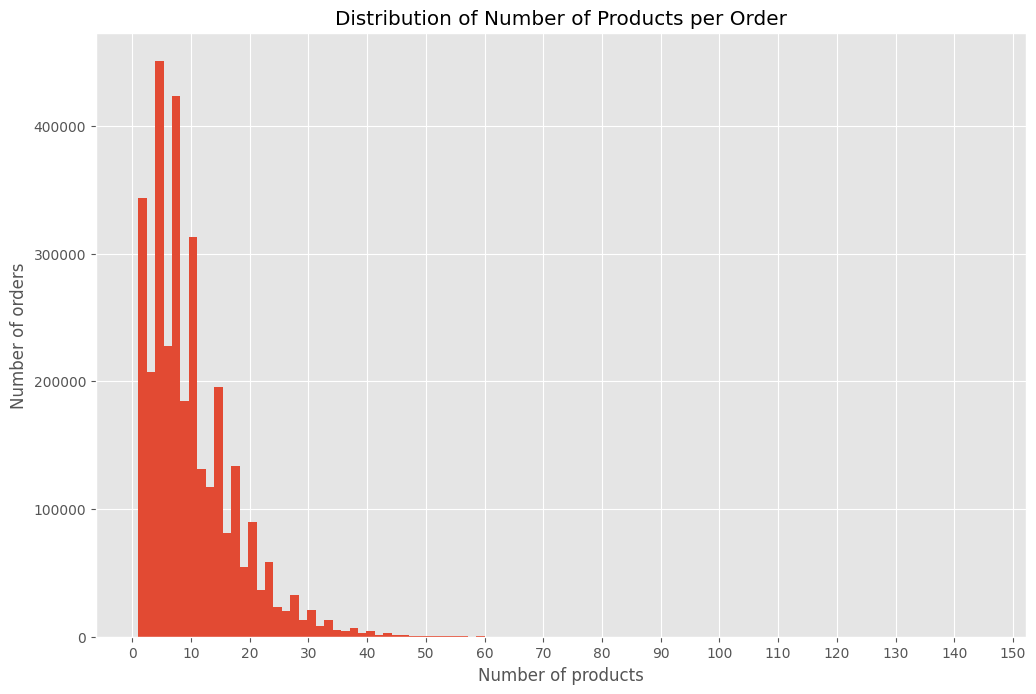

In [28]:
order_dist = op_prior.order_id.value_counts()


plt.figure(figsize=[12, 8], dpi=100)
plt.hist(x=order_dist, bins=100)
plt.xticks(np.arange(0, 160, 10))
plt.title("Distribution of Number of Products per Order")
plt.xlabel('Number of products')
plt.ylabel('Number of orders')
plt.show()

People usually order 5 prouducts.

In [29]:
op_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [3]:
products = pd.read_csv('../data/products.csv')

In [31]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [33]:
%%timeit
op_prior_extra = op_prior.merge(products[['product_id', 'product_name']],
                               on=['product_id', 'product_id'])

4.93 s ± 81.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [42]:
op_prior_extra.head()

,order_id,product_id,add_to_cart_order,reordered,product_name
0,2,33120,1,1,Organic Egg Whites
1,26,33120,5,0,Organic Egg Whites
2,120,33120,13,0,Organic Egg Whites
3,327,33120,5,1,Organic Egg Whites
4,390,33120,28,1,Organic Egg Whites


In [38]:
products_sub = products[['product_id', 'product_name']]
products_sub.set_index('product_id', inplace=True)
op_prior.set_index('product_id', inplace=True)

In [41]:
%%timeit
op_prior_extra = op_prior.join(products_sub)

5.09 s ± 80.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
op_prior_extra.reset_index(inplace=True)

In [43]:
import time as time 
start = time.time()
product_order_dist = op_prior_extra.groupby(['product_name'])['add_to_cart_order'].sum()
print('Time: ', time.time() - start)

Time:  2.643825054168701


In [44]:
# class Groupby:
#     def __init__(self, keys):
#         _, self.keys_as_int = np.unique(keys, return_inverse = True)
#         self.n_keys = max(self.keys_as_int) + 1
#         self.set_indices()
        
#     def set_indices(self):
#         self.indices = [[] for i in range(self.n_keys)]
#         for i, k in enumerate(self.keys_as_int):
#             self.indices[k].append(i)
#         self.indices = [np.array(elt) for elt in self.indices]
        
#     def apply(self, function, vector, broadcast):
#         if broadcast:
#             result = np.zeros(len(vector))
#             for idx in self.indices:
#                 result[idx] = function(vector[idx])
#         else:
#             result = np.zeros(self.n_keys)
#             for k, idx in enumerate(self.indices):
#                 result[self.keys_as_int[k]] = function(vector[idx])

#         return result

In [45]:
# product_name = np.array(op_prior_extra['product_name'])
# add_to_cart_order = np.array(op_prior_extra['add_to_cart_order'])


# grouped = Groupby(product_name)
# group_means = Groupby(product_name).apply(sum, add_to_cart_order, broadcast=False)

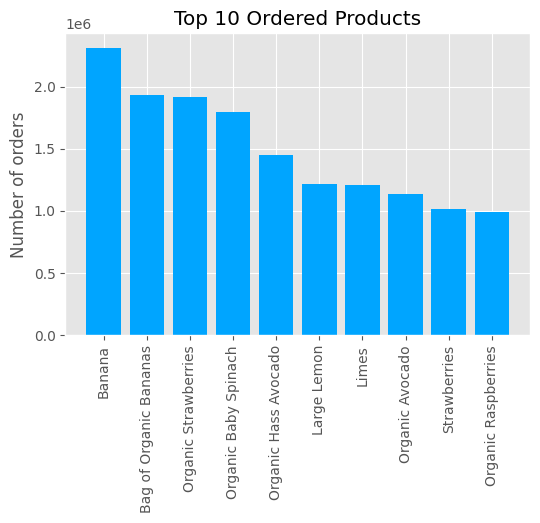

In [68]:
top_ten_ordered_products = product_order_dist.sort_values(ascending=False)[:10]

plt.figure(dpi=100)
plt.bar(top_ten_ordered_products.index,
       top_ten_ordered_products.values, color='#00A5FF')
plt.xticks(rotation='vertical')
plt.title('Top 10 Ordered Products')
plt.ylabel('Number of orders')
plt.show()

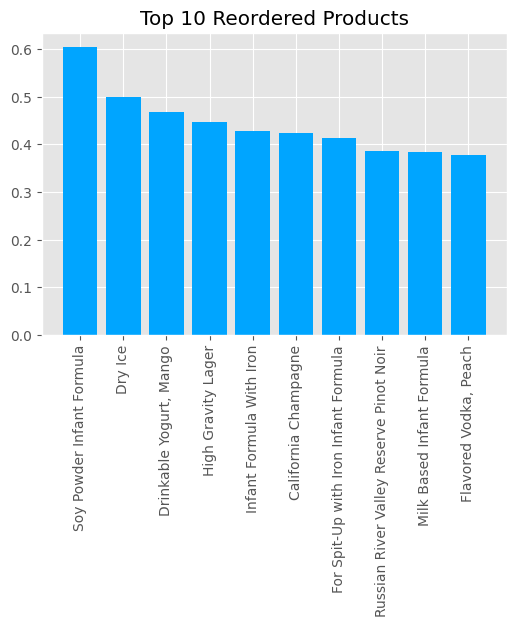

In [69]:
product_reorder = op_prior_extra.groupby(['product_name'])['reordered'].sum()

prod_ord_reord = product_reorder.to_frame().merge(product_order_dist.to_frame(),
                                on=['product_name', 'product_name']).reset_index(
    level=0, drop=True)

prod_ord_reord.loc[:, 'reord_prob'] = prod_ord_reord.loc[:, 'reordered']/prod_ord_reord.loc[:, 'add_to_cart_order']

top_ten_most_reord_prob = prod_ord_reord.reord_prob.sort_values(ascending=False)[:10]

plt.figure(dpi=100)
plt.bar(top_ten_most_reord_prob.index,
       top_ten_most_reord_prob.values, color = '#00A5FF')
plt.xticks(rotation='vertical')
plt.title('Top 10 Reordered Products')
plt.show()

In [4]:
orders = pd.read_csv('../data/orders.csv')

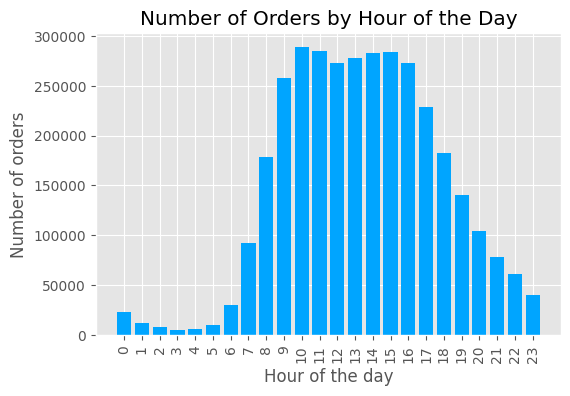

In [75]:
order_hour_dist = orders.order_hour_of_day.value_counts()
plt.figure(dpi=100)
plt.bar(order_hour_dist.index, order_hour_dist.values, color = '#00A5FF')
plt.xticks(np.linspace(0, 23, 24), rotation='vertical')
plt.title('Number of Orders by Hour of the Day')
plt.xlabel('Hour of the day')
plt.ylabel('Number of orders')
plt.show()

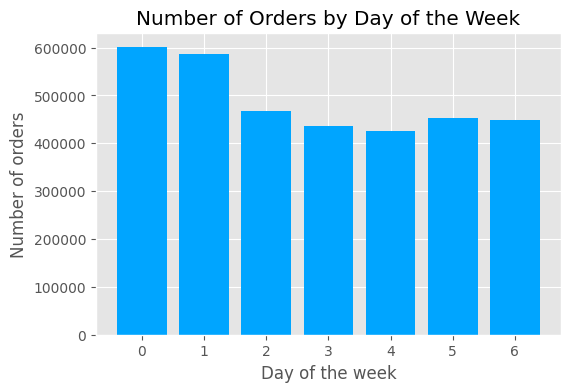

In [76]:
order_dow_dist = orders.order_dow.value_counts()

plt.figure(dpi=100)
plt.bar(order_dow_dist.index, order_dow_dist.values, color = '#00A5FF')
plt.xticks(np.linspace(0, 6, 7))
plt.title('Number of Orders by Day of the Week')
plt.xlabel('Day of the week')
plt.ylabel('Number of orders')
plt.show()

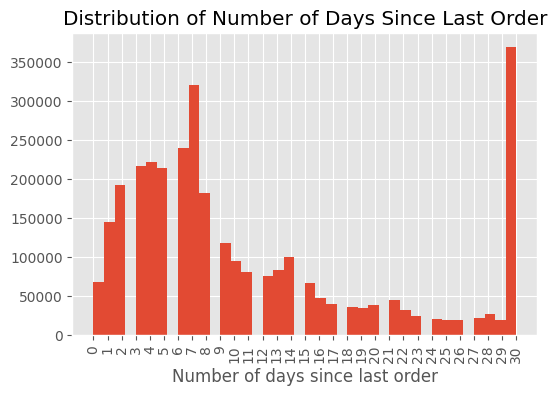

In [78]:
plt.figure(dpi=100)
plt.hist(orders.days_since_prior_order, bins=40)
plt.xticks(np.linspace(0, 30, 31), rotation='vertical')
plt.title('Distribution of Number of Days Since Last Order')
plt.xlabel('Number of days since last order')
plt.show()

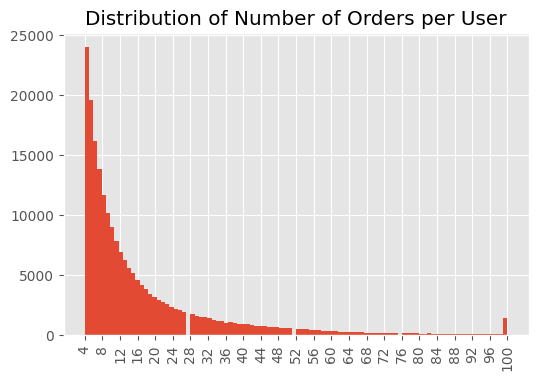

In [80]:
user_order_freq = orders.groupby(['user_id'])['order_id'].nunique()

user_order_freq = user_order_freq.to_frame()
user_order_freq.columns = ['norder']

# user_order_freq['norder'] = 0

# for i in range(len(user_order_freq)):
#     user_order_freq.iloc[i, 1] = len(user_order_freq.iloc[i, 0])

plt.figure(dpi=100)
plt.hist(user_order_freq.norder, bins=100)
plt.xticks(np.linspace(4, 100, 25), rotation='vertical', fontsize=10)
plt.title('Distribution of Number of Orders per User')
plt.show()

In [81]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [82]:
user_order_freq.head()

,norder
user_id,
1,11
2,15
3,13
4,6
5,5


In [5]:
products = pd.read_csv('../data/products.csv')
departments = pd.read_csv('../data/departments.csv')

In [84]:
products = products.merge(departments, on=['department_id', 'department_id'])

In [85]:
products.head()

,product_id,product_name,aisle_id,department_id,department
0,1,Chocolate Sandwich Cookies,61,19,snacks
1,16,Mint Chocolate Flavored Syrup,103,19,snacks
2,25,Salted Caramel Lean Protein & Fiber Bar,3,19,snacks
3,32,Nacho Cheese White Bean Chips,107,19,snacks
4,41,Organic Sourdough Einkorn Crackers Rosemary,78,19,snacks


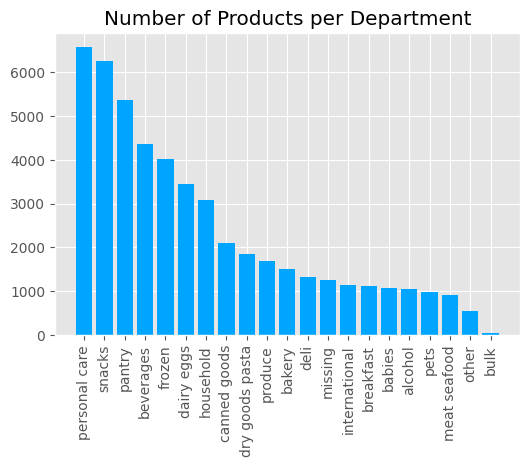

In [87]:
product_dept_dist = products.department.value_counts()

plt.figure(dpi=100)
plt.bar(product_dept_dist.index, product_dept_dist.values, color='#00A5FF')
plt.xticks(rotation='vertical')
plt.title('Number of Products by Department')
plt.show()

In [6]:
aisles = pd.read_csv('../data/aisles.csv')

In [89]:
products = products.merge(aisles, on=['aisle_id', 'aisle_id'])

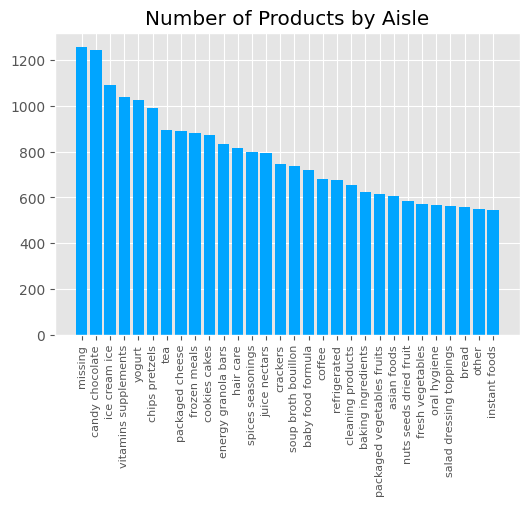

In [99]:
aisle_prod_dist = products.aisle.value_counts()[:30]

plt.figure(dpi=100)
plt.bar(aisle_prod_dist.index, aisle_prod_dist.values, color='#00A5FF')
plt.xticks(rotation='vertical', fontsize=8)
plt.title('Number of Products by Aisle')
plt.show()

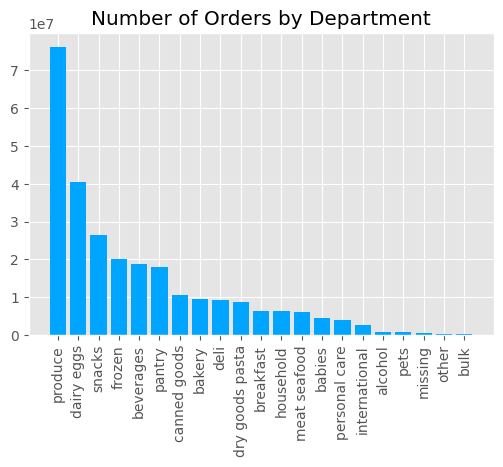

In [100]:
op_prior_extra = op_prior_extra.merge(products,
                                     on=['product_name', 'product_name'])

op_prior_extra = op_prior_extra.drop(columns=['product_id_x'])
op_prior_extra = op_prior_extra.rename(columns={'product_id_y' : 'product_id'})

order_dept_dist = op_prior_extra.groupby(['department'])['add_to_cart_order'].sum()

order_dept_dist = order_dept_dist.sort_values(ascending=False)

plt.figure(dpi=100)
plt.bar(order_dept_dist.index,
       order_dept_dist.values, color='#00A5FF')
plt.xticks(rotation='vertical')
plt.title('Number of Orders by Department')
plt.show()

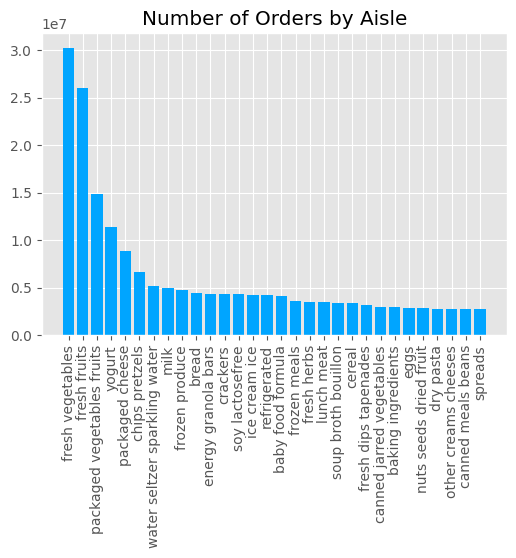

In [97]:
order_aisle_dist = op_prior_extra.groupby(['aisle'])['add_to_cart_order'].sum()

order_aisle_dist = order_aisle_dist.sort_values(ascending=False)[:30]

plt.figure(dpi=100)
plt.bar(order_aisle_dist.index,
       order_aisle_dist.values, color='#00A5FF')
plt.xticks(rotation='vertical')
plt.title('Number of Orders by Aisle')
plt.show()

In [95]:
orders = orders.merge(op_prior_extra, on=['order_id', 'order_id'])

In [96]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,product_name,...,aisle_x,aisle_id_y,department_id_y,department_y,aisle_y,product_id,aisle_id,department_id,department,aisle
0,2539329,1,prior,1,2,8,NaN,1,0,Soda,...,soft drinks,77,7,beverages,soft drinks,196,77,7,beverages,soft drinks
1,2539329,1,prior,1,2,8,NaN,2,0,Organic Unsweetened Vanilla Almond Milk,...,soy lactosefree,91,16,dairy eggs,soy lactosefree,14084,91,16,dairy eggs,soy lactosefree
2,2539329,1,prior,1,2,8,NaN,4,0,Aged White Cheddar Popcorn,...,popcorn jerky,23,19,snacks,popcorn jerky,26088,23,19,snacks,popcorn jerky
3,2539329,1,prior,1,2,8,NaN,3,0,Original Beef Jerky,...,popcorn jerky,23,19,snacks,popcorn jerky,12427,23,19,snacks,popcorn jerky
4,2539329,1,prior,1,2,8,NaN,5,0,XL Pick-A-Size Paper Towel Rolls,...,paper goods,54,17,household,paper goods,26405,54,17,household,paper goods


- http://esantorella.com/2016/06/16/groupby/
- https://pandas.pydata.org/pandas-docs/stable/user_guide/enhancingperf.html 
